# Download Dataset

Jika menggunakan google colab, untuk mendownload dataset dari kaggle lebih baik mendownload nya langsung karena langsung menggunakan koneksi dari googlenya sehingga tidak perlu mengupload ke drive atau google colab. Jika menggunakan Jupyter Notebook yang dimana datasetnya berada di local maka, langsung saja di import datasetnya dari folder datasets.

In [1]:
!pip install kaggle

Mengupload file json yang digunakan untuk login ke kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rofikhidayat","key":"d892a1f4bf4f5b70c6ef37688a2eca8a"}'}

Membuat dir kaggle dan mengubah permission json yang di upload tadi

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Mendownload dataset london-crime dari kaggle

In [4]:
!kaggle datasets download -d jboysen/london-crime

 93% 113M/121M [00:04<00:00, 21.4MB/s]
100% 121M/121M [00:04<00:00, 29.4MB/s]


Unzip dataset

In [5]:
!mkdir dataset
!unzip ./london-crime.zip -d ./dataset
!ls -l ./dataset

Archive:  ./london-crime.zip
  inflating: ./dataset/london_crime_by_lsoa.csv  
total 910948
-rw-r--r-- 1 root root 932802830 Sep 20  2019 london_crime_by_lsoa.csv


#Import Data

import datasetnya dari folder dataset.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_crime = pd.read_csv("./dataset/london_crime_by_lsoa.csv")
df_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Cek apakah terdapat value yang null

In [ ]:
df_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Hapus colom yang tidak digunakan

In [ ]:
df_crime.drop(["lsoa_code"],axis=1,inplace=True)
df_crime

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


#Area Plot

menjumlahkan nilai Value berdasarkan year dan major_category yang dimasukkan ke variable total_ByYear

In [ ]:
total_ByYear = df_crime.groupby(['year','major_category']).sum().drop(['month'],axis=1)
total_ByYear

value
year major_category                     
2008 Burglary                      88092
     Criminal Damage               91872
     Drugs                         68804
     Fraud or Forgery               5325
     Other Notifiable Offences     10112
...                                  ...
2016 Other Notifiable Offences     15809
     Robbery                       22528
     Sexual Offences                   0
     Theft and Handling           294133
     Violence Against the Person  232381

[81 rows x 1 columns]

Me reset index yang tadinya multi index dan merubah nama colom value ke total

In [ ]:
total_ByYear.reset_index(inplace=True)
total_ByYear.rename(columns={'value':'total'}, inplace=True)
total_ByYear

,year,major_category,total
0,2008,Burglary,88092
1,2008,Criminal Damage,91872
2,2008,Drugs,68804
3,2008,Fraud or Forgery,5325
4,2008,Other Notifiable Offences,10112
...,...,...,...
76,2016,Other Notifiable Offences,15809
77,2016,Robbery,22528
78,2016,Sexual Offences,0
79,2016,Theft and Handling,294133


Mengelompokkan nilai total dari tiap major_category berdasarkan index year

In [ ]:
total_ByYear = total_ByYear.pivot(index='year', columns='major_category', values='total')
total_ByYear

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Visualisasi data menggunakan area plot

Text(0.5, 1.0, 'major Category')

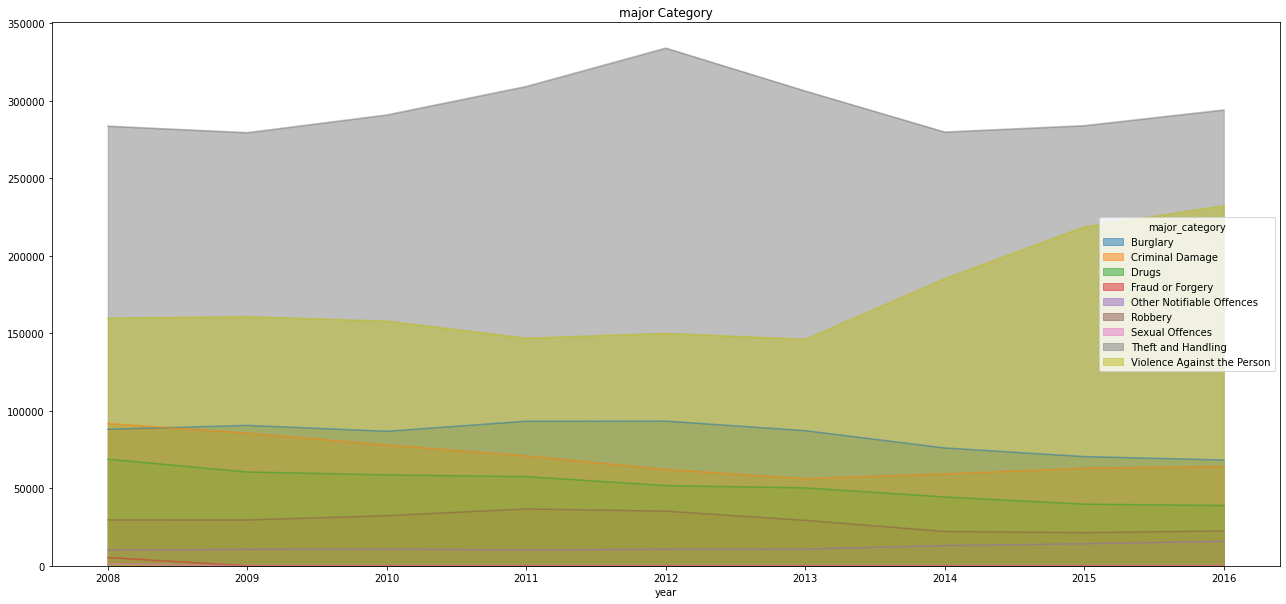

In [ ]:
plot = total_ByYear.plot(kind="area",figsize=(22,10),alpha=0.5, stacked=False)
plot.set_title("major Category")

Berdasarkan area plot tersebut category kejahatan paling tinggi tiap tahunnya merupakan Theft and Handling, dan category Violence Again Person naik drastis pada tahun 2013, sedangkan category lain mengalami penurunan.

#Wafle Chart

In [ ]:
df_crime

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


Mengambil 3 value teratas yang telah dijumlah berdasarkan borough

In [ ]:
borough_ByVal = df_crime.groupby(['borough']).sum().drop(['month','year'],axis=1)
borough_ByVal.sort_values(by='value', ascending=False, inplace=True)
borough_ByVal = borough_ByVal.head(3)
borough_ByVal

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809


mencari total jumlah dari value

In [ ]:
total_top3 = sum(borough_ByVal.value)
total_top3

1026015

membuat porsi value yang nantinya digunakan untuk menentukan jumlah tiles tiap borough

In [ ]:
proportion = [(float(val)/total_top3) for val in borough_ByVal.value]
for idx, porsion in enumerate(proportion):
  print(borough_ByVal.index.values[idx], porsion)

Westminster 0.44349059224280346
Lambeth 0.284769715842361
Southwark 0.27173969191483555


Menentukan batas dari tile atau total tile

In [ ]:
width, height = (50, 10)
total_tiles = width * height
total_tiles

500

menentukan jumlah tiles tiap borough

In [ ]:
tiles_per_borough = [round(porsion * total_tiles) for porsion in proportion]
tiles_per_borough

[222, 142, 136]

membuat tiles tiap borough dalam bentuk array

In [ ]:
tile_index = 0
borough_index = 0
waffle_chart = np.zeros((width,height))

for col in range(width):
  for row in range(height):
    tile_index += 1
    if tile_index > sum(tiles_per_borough[0: borough_index]):
      borough_index += 1
      
    waffle_chart[col, height - (row + 1)] = borough_index

waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 

mengubah dimensi orientasi array tiles dari vertikal ke horizontal

In [ ]:
waffle_chart = waffle_chart.transpose()

visualisasi array tiles

In [ ]:
import matplotlib.patches as mpatches

<Figure size 432x288 with 0 Axes>

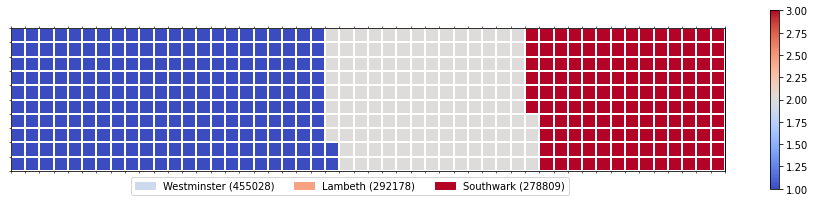

In [ ]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
ax.set_yticks(np.arange(-.5, (height), 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

#menambahkan label 
plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(borough_ByVal['value'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, borough in enumerate(borough_ByVal.index.values):
    label_str = borough + ' (' + str(borough_ByVal['value'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(borough_ByVal.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Berdasarkan Chart tersebut kota yang sering mengalami kasus kejahatan merupakan Westminster.

#Pie Chart

In [ ]:
total_ByYear

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


mengubah dimensi orientasi data total_ByYear lalu membuat colom total dengan value jumlah dari major_category tiap tahun

In [ ]:
total_ByCategory = total_ByYear.transpose()
total_ByCategory['Total'] = total_ByCategory.sum(axis=1)
total_ByCategory 

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


Visualisasi data dengan pie chart

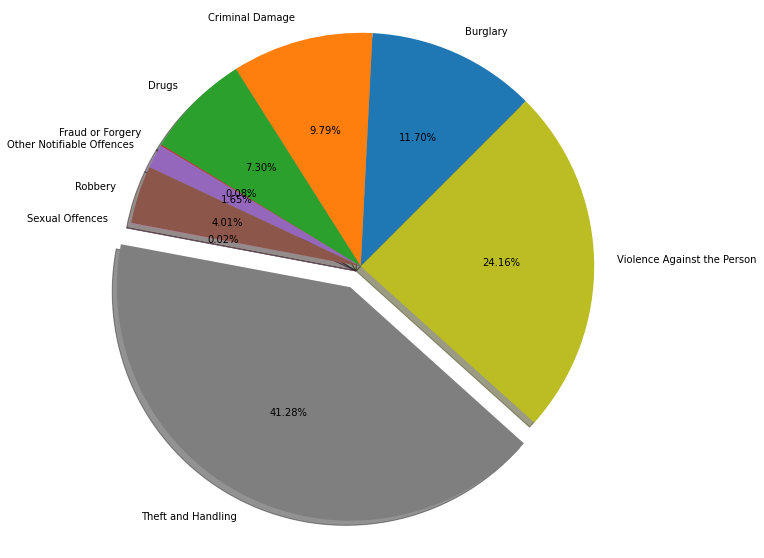

In [ ]:
fig, plot = plt.subplots()
plot.pie(total_ByCategory.Total, explode=(0,0,0,0,0,0,0,0.1,0), labels=total_ByCategory.index, autopct='%.2f%%',
         shadow=True, startangle=45)
plot.axis('equal')
fig.set_size_inches(10,10)
plt.show()

Berdasarkan pie chart tersebut, category Theft and Handling memiliki persentase paling tinggi dibanding category yang lain. dan Sexual Offense memiliki persentasi paling rendah.

Meringkas menjadi top 5 category

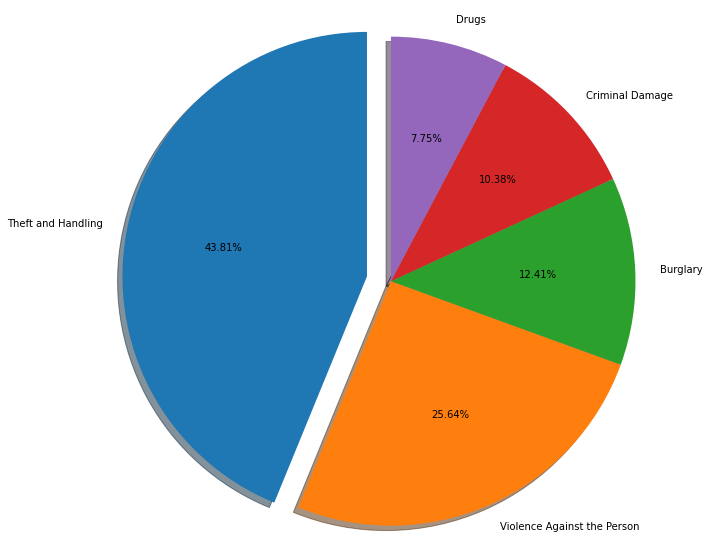

In [ ]:
top5crime = total_ByCategory.sort_values(by='Total', ascending=False).head(5)
fig, plot = plt.subplots()
plot.pie(top5crime.Total, explode=(0.1,0,0,0,0), labels=top5crime.index, autopct='%.2f%%', shadow=True, startangle=90)
plot.axis('equal')
fig.set_size_inches(10,10)
plt.show()

# Bar Chart

In [ ]:
top5crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


reset index dari data top5crime

In [ ]:
top5crime.reset_index(inplace=True)
top5crime

year,major_category,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
0,Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
1,Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
2,Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
3,Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
4,Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


memisahkan X dan Y

In [ ]:
x = top5crime.major_category.values
y = top5crime.Total.values

Visualisasi data top5crime menggunakan bar plot

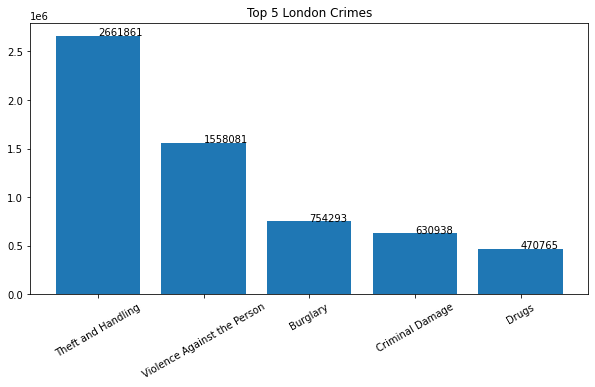

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y)
plt.title("Top 5 London Crimes")
plt.xticks(rotation=30)
for idx in range(len(x)):
  plt.text(idx, y[idx], y[idx])
plt.show()

Berdasarkan bar chart tersebut major category paling tinggi kasusnya adalah Theft and Handling dengan total kasus (2661861).


#Word Clouds

In [ ]:
df_crime

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


menghitung jumlah value dari setiap minor_category

In [ ]:
df_crime.minor_category.value_counts()

Common Assault                            522180
Other Theft                               522180
Theft From Motor Vehicle                  522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

mengimport library WordCloud

In [ ]:
from wordcloud import WordCloud

Menghilangkan colom yang tidak dibutuhkan

In [ ]:
df_minorCategory = df_crime.drop(['value','year','month','borough','major_category'],axis=1)
df_minorCategory

,minor_category
0,Burglary in Other Buildings
1,Other violence
2,Other violence
3,Burglary in Other Buildings
4,Personal Property
...,...
13490599,Criminal Damage To Dwelling
13490600,Personal Property
13490601,Burglary in a Dwelling
13490602,Business Property


membuat wordcloud dengan dengan memisahkan tiap kata dengan 'spasi' pada colom minor_category

In [ ]:
minorCategory = WordCloud().generate(' '.join(df_crime['minor_category']))

Menampilkan wordcloud 

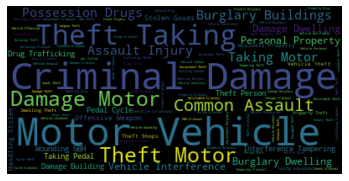

In [ ]:
plt.imshow(minorCategory, interpolation="bilinear")
plt.axis('off')
plt.show()

Berdasarkan data wordloud kata yang paling banyak muncul adalah kata 
* Criminal
* Damage
* Motor
* Vehicle

# KESIMPULAN

kasus kejahatan pada london yang sering terjadi merupakan Thieft and Handling dimana tiap tahun dari tahun 2008 - 2016 selalu menjadi kasus tertinggi, dan kasus Violence Against the Person mengalami lonjakan kasus pada tahun 2013 dan terus naik hingga 2016 sementara kasus dari kategori lainnya mengalami penurunan. Untuk kota yang paling sering mengalami kasus kejahatan merupakan Westminster, Lambeth, dan Southwark.